<a href="https://colab.research.google.com/github/sagarikabolla/EDA-on-Retail-Sales-Data/blob/main/EDA_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Shape: (1000, 9)
Columns: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Quantity'] > 0]
df = df[df['Price per Unit'] > 0]
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

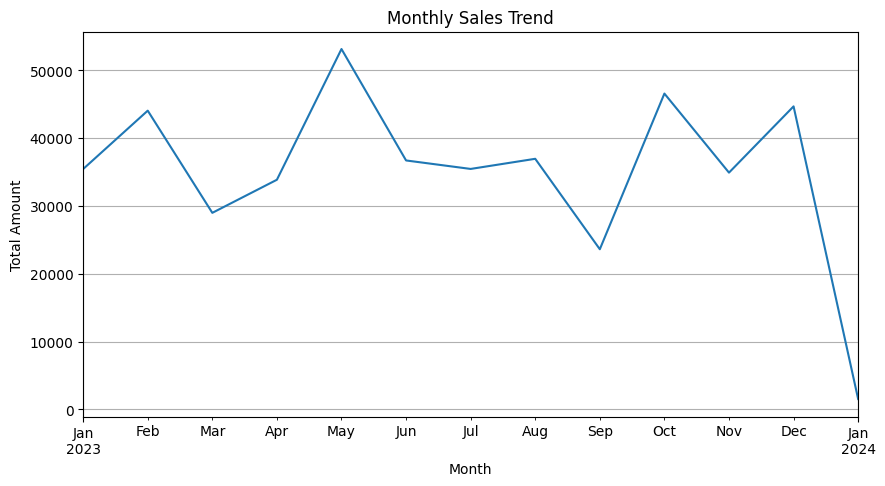

In [ ]:
monthly_sales = df.set_index('Date').resample('ME')['Total Amount'].sum()
monthly_sales.plot(figsize=(10, 5), title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

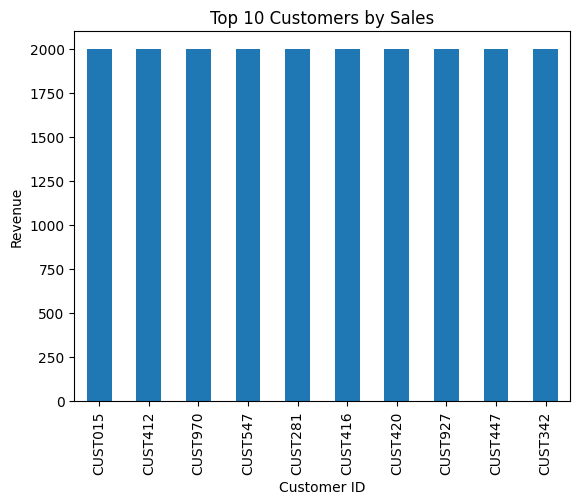

In [ ]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Sales')
plt.ylabel("Revenue")
plt.show()

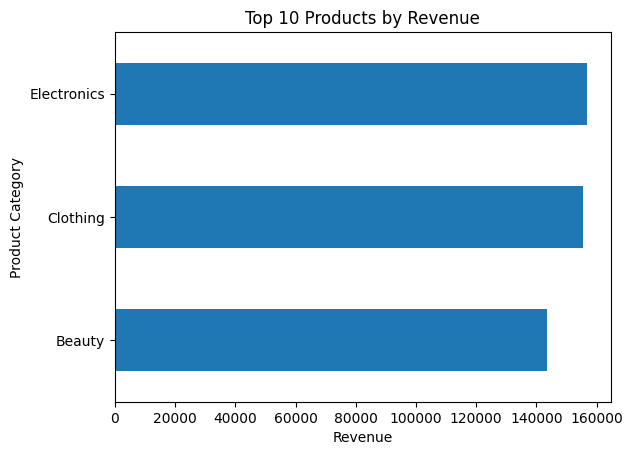

In [ ]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Revenue')
plt.xlabel("Revenue")
plt.gca().invert_yaxis()
plt.show()

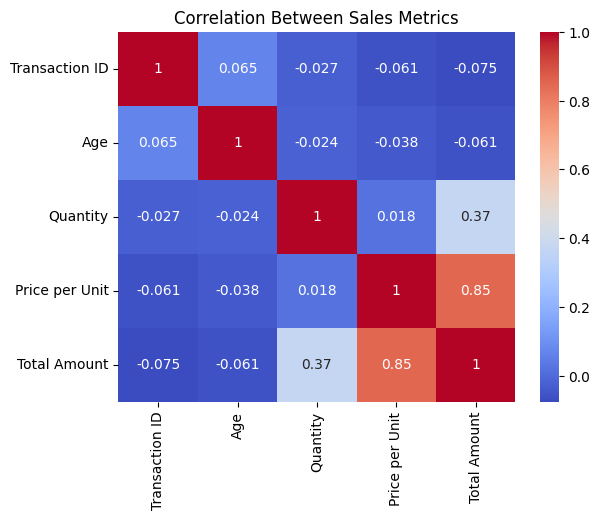

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales Metrics")
plt.show()


       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

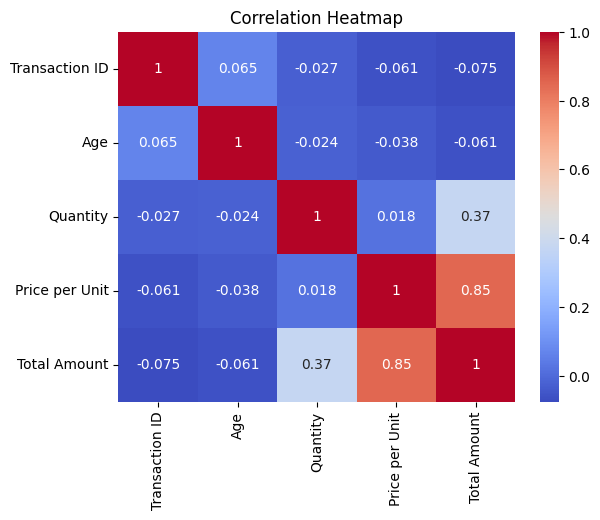

In [ ]:
print(df.describe())
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

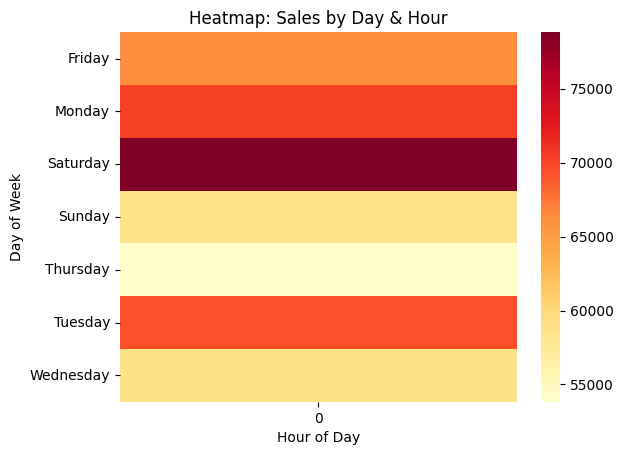

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

heatmap_data = df.groupby(['DayOfWeek', 'Hour'])['Total Amount'].sum().unstack()
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Heatmap: Sales by Day & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [ ]:
summary = {
    'Total Revenue': df['Total Amount'].sum(),
    'Total Orders': df['Date'].nunique(),
    'Unique Products': df['Product Category'].nunique(),
    'Total Customers': df['Customer ID'].nunique()
}
summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
print(summary_df)

                  Value
Total Revenue    456000
Total Orders        345
Unique Products       3
Total Customers    1000


/tmp/ipython-input-22-3452980810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_seg, x='Segment', palette='viridis')


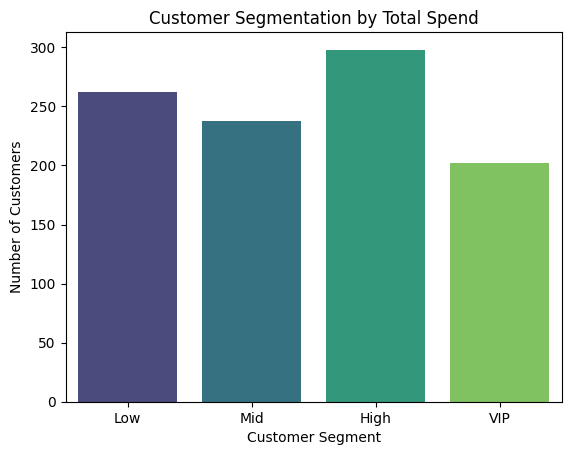

In [ ]:
customer_seg = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
customer_seg['Segment'] = pd.qcut(customer_seg['Total Amount'], q=4, labels=['Low', 'Mid', 'High', 'VIP'])

# Visualize segments
sns.countplot(data=customer_seg, x='Segment', palette='viridis')
plt.title("Customer Segmentation by Total Spend")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
if 'Category' in df.columns:
    category_sales = df.groupby('Category')['Total Sales'].sum().sort_values()
    category_sales.plot(kind='barh', title='Sales by Product Category', color='green')
    plt.xlabel("Total Sales (₹)")
    plt.tight_layout()
    plt.show()


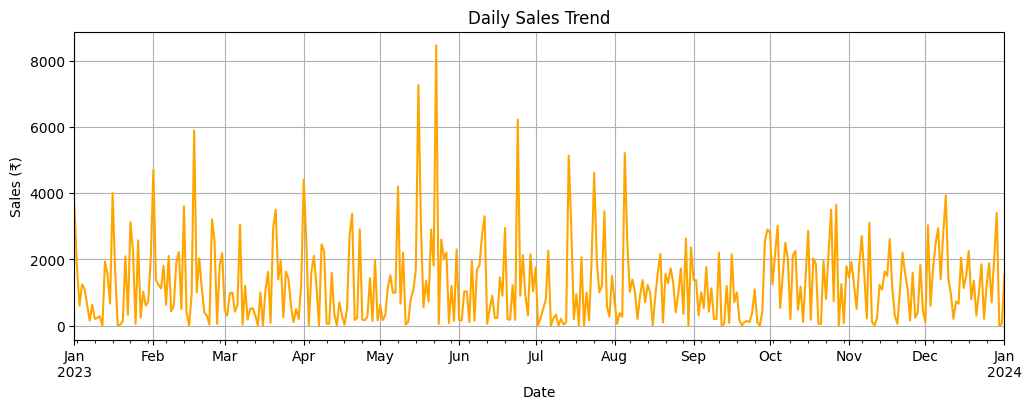

In [ ]:
daily_sales = df.set_index('Date').resample('D')['Total Amount'].sum()
daily_sales.plot(figsize=(12, 4), title='Daily Sales Trend', color='orange')
plt.ylabel("Sales (₹)")
plt.grid(True)
plt.show()

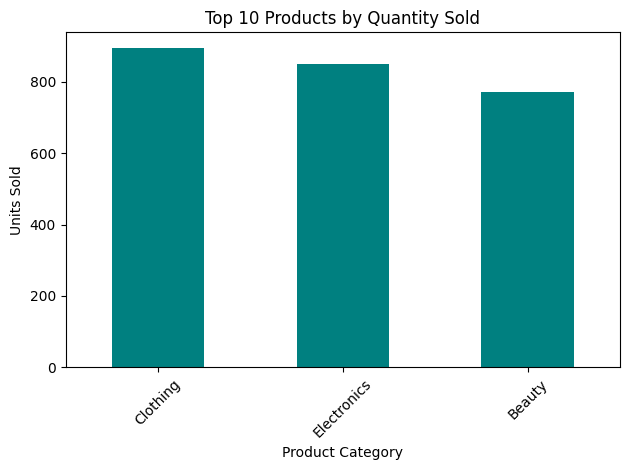

In [ ]:
top_qty_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
top_qty_products.plot(kind='bar', color='teal', title='Top 10 Products by Quantity Sold')
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

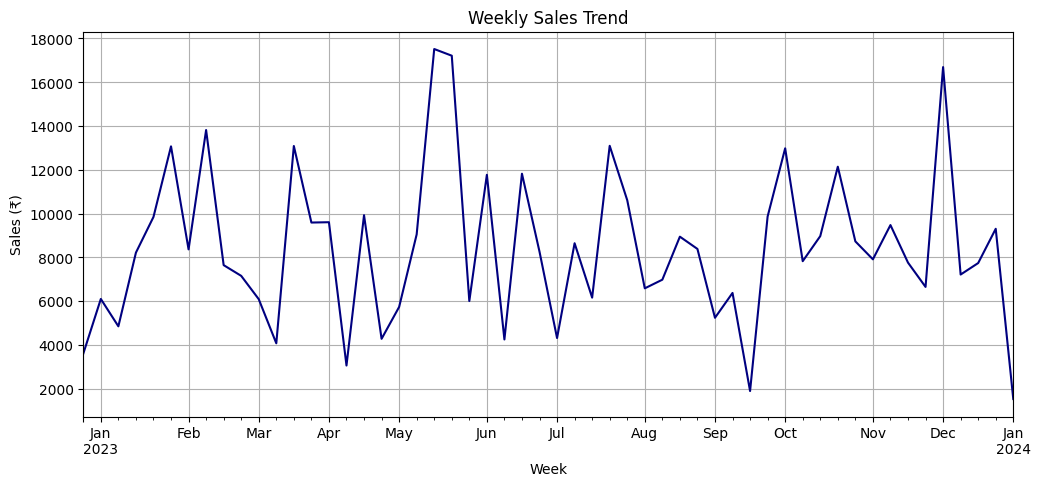

In [ ]:
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales = df.groupby('Week')['Total Amount'].sum()

weekly_sales.plot(figsize=(12, 5), title='Weekly Sales Trend', color='navy')
plt.ylabel("Sales (₹)")
plt.xlabel("Week")
plt.grid(True)
plt.show()

/tmp/ipython-input-31-2914649696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=repeat_type, palette='pastel')


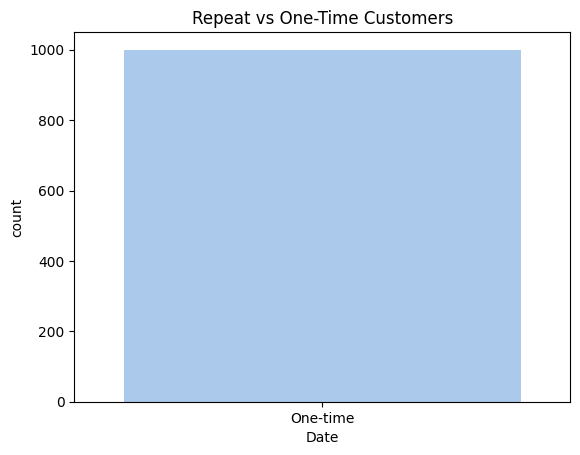

In [ ]:
order_counts = df.groupby('Customer ID')['Date'].nunique()
repeat_type = order_counts.apply(lambda x: 'Repeat' if x > 1 else 'One-time')
sns.countplot(x=repeat_type, palette='pastel')
plt.title("Repeat vs One-Time Customers")
plt.show()

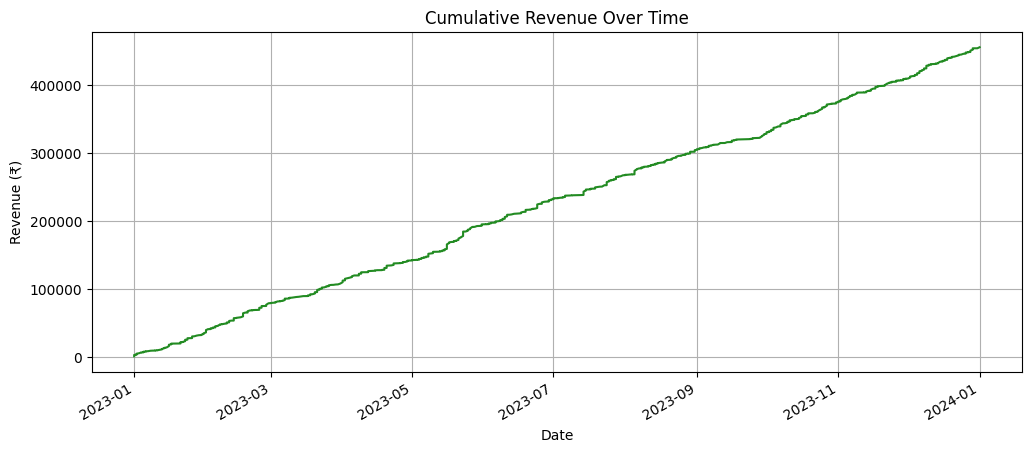

In [ ]:
df_sorted = df.sort_values(by='Date')
df_sorted['Cumulative Revenue'] = df_sorted['Total Amount'].cumsum()

df_sorted.set_index('Date')['Cumulative Revenue'].plot(figsize=(12,5), title='Cumulative Revenue Over Time', color='forestgreen')
plt.ylabel("Revenue (₹)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

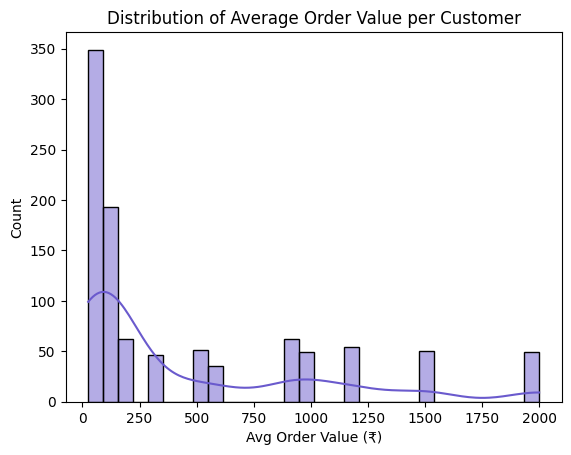

In [ ]:
avg_order_value = df.groupby('Customer ID')['Total Amount'].mean()
sns.histplot(avg_order_value, bins=30, color='slateblue', kde=True)
plt.title("Distribution of Average Order Value per Customer")
plt.xlabel("Avg Order Value (₹)")
plt.show()

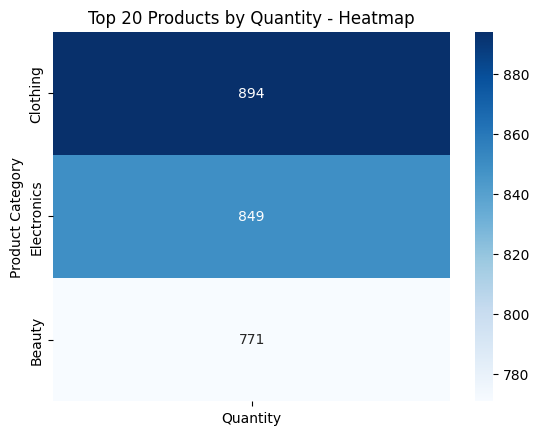

In [ ]:
# Optional for large product catalog
product_qty = df.pivot_table(index='Product Category', values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False).head(20)
sns.heatmap(product_qty, annot=True, fmt='.0f', cmap='Blues')
plt.title("Top 20 Products by Quantity - Heatmap")
plt.show()